# Replication of findings from Pitt & Hill (2016): Table 1

In [168]:
# some programmatic housekeeping
import os
import sys
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(215)
%matplotlib inline

notebook = "PittHill_table1.ipynb" # replace with FILENAME
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(notebook), '..', 'data')))

In [ ]:
def PoissonTriples_exact(moment, N):
    """
    This function computes the probability that triples of Poisson random variables
    contain their own rounded mean based on the formula given in Pitt & Hill, 2016.
    
    Parameters
    ----------
    moment : integer
              The mean-variance parameter of the Poisson distribution from which
              triples of Poisson random variables are to be generated.
         
    N : integer
         The...
    
    Returns
    -------
    prob : numeric
            The exact probability that triples of Poisson random variables contain
            their own rounded means.
    """
    for j in list(range(2, N + 1)):
        for k in list(range(j, N + 1)):
            inner = poisson.pmf(k - (j / 2), moment) + ((j % 2) * poisson.pmf(k - (j / 2) - 1, moment))
            outer = poisson.pmf(k, moment) * poisson.pmf(k - j, moment)
            prob = outer * inner
    
    prob = 6 * prob
    return(prob)

In [169]:
def PoissonTriples_empirical(moment, n_times):
    """
    This function computes the probability that triples of Poisson random variables
    contain their own rounded mean.
    
    Parameters
    ----------
    moment : integer
              The mean-variance parameter of the Poisson distribution from which
              triples of random variables are to be generated.
    n_times : integer
               The number of Poisson triples (from a distribution parameterized by
               the moment argument) to use in computing the probability.
               
    Returns
    -------
    prob : numeric
            The empirically computed probability that triples of Poisson random
            variables contain their rounded own means.
    """
    inCounter = 0
    
    for i in range(n_times):
        poisTriple = poisson.rvs(moment, size = 3)
        tripleMean = int(np.round(np.mean(poisTriple), decimals = 0))
        meanCheck = np.sum(np.in1d(poisTriple, tripleMean))
    
        if meanCheck != 0:
            inCounter += 1
    
    prob = inCounter / n_times
    return(prob)

In [170]:
nTriples = 1000 # number of RV triples to generate to compute the empirical probability
poisMoments = range(1, 1000) # each mean-variance parameter of the Poisson distribution
probs = np.zeros(len(poisMoments))

# Computing the inclusion probability of the mean using (nTriples) of Poisson RV triples
# across as many values of the mean-variance parameter as specified above. This loop takes
# a while to run -- on the order of 2-5 minutes...
for i in range(len(poisMoments)):
    probs[i] = PoissonTriples_empirical(poisMoments[i], nTriples)

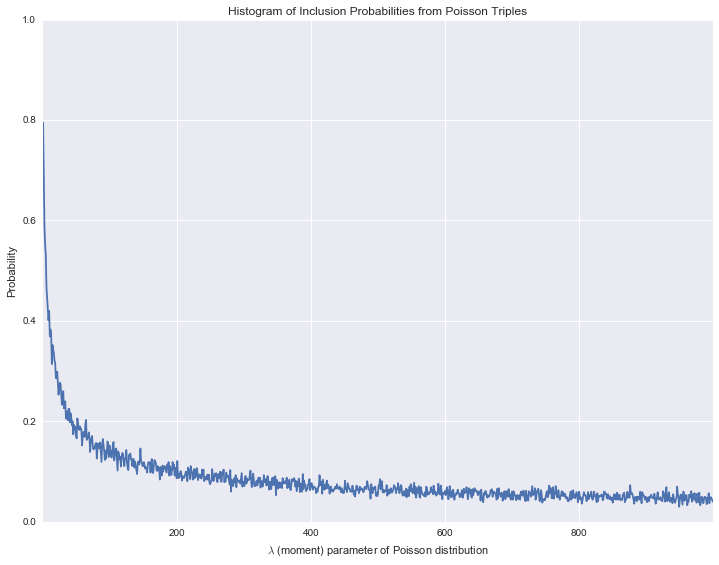

In [171]:
plt.figure(num = None, figsize=(12, 9), dpi=80)
plt.plot(poisMoments, probs)
plt.xlabel('$\lambda$ (moment) parameter of Poisson distribution')
plt.ylabel('Probability')
plt.title(r'Histogram of Inclusion Probabilities from Poisson Triples')
plt.axis([min(poisMoments), max(poisMoments), 0, min(1.5 * max(probs), 1)])
plt.show()

The plot above illustrates the decrease in the _empirical inclusion probabilities_ for __1000 triples__ of Poisson random variables containing their own rounded mean, across _increasing magnitudes_ of the Poisson mean-variance (moment) parameter, which is set to range from __1 to 999__.

In [172]:
probs_df = pd.DataFrame(data = [poisMoments, probs]).transpose()
probs_df.columns = ["$\lambda$", "Inclusion Probability"]
table1 = probs_df.head(25)
table1

,$\lambda$,Inclusion Probability
0,1.0,0.795
1,2.0,0.697
2,3.0,0.586
3,4.0,0.552
4,5.0,0.531
5,6.0,0.467
6,7.0,0.445
7,8.0,0.423
8,9.0,0.401
9,10.0,0.420


The table above displays the empirical inclusion probability of the mean of 1000 Poisson random variables across differing values of the $\lambda$ parameter. The _empirical inclusion probability of the mean_ is computed by generating 1000 triples of Poisson random variables for a given realization of the $\lambda$ parameter, counting the number of triples that contain their own rounded mean, and dividing this by the number of triples generated (1000). This is performed for realizations of the Poisson $\lambda$ parameter from 1 to 999.